Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.



<IPython.core.display.Javascript object>


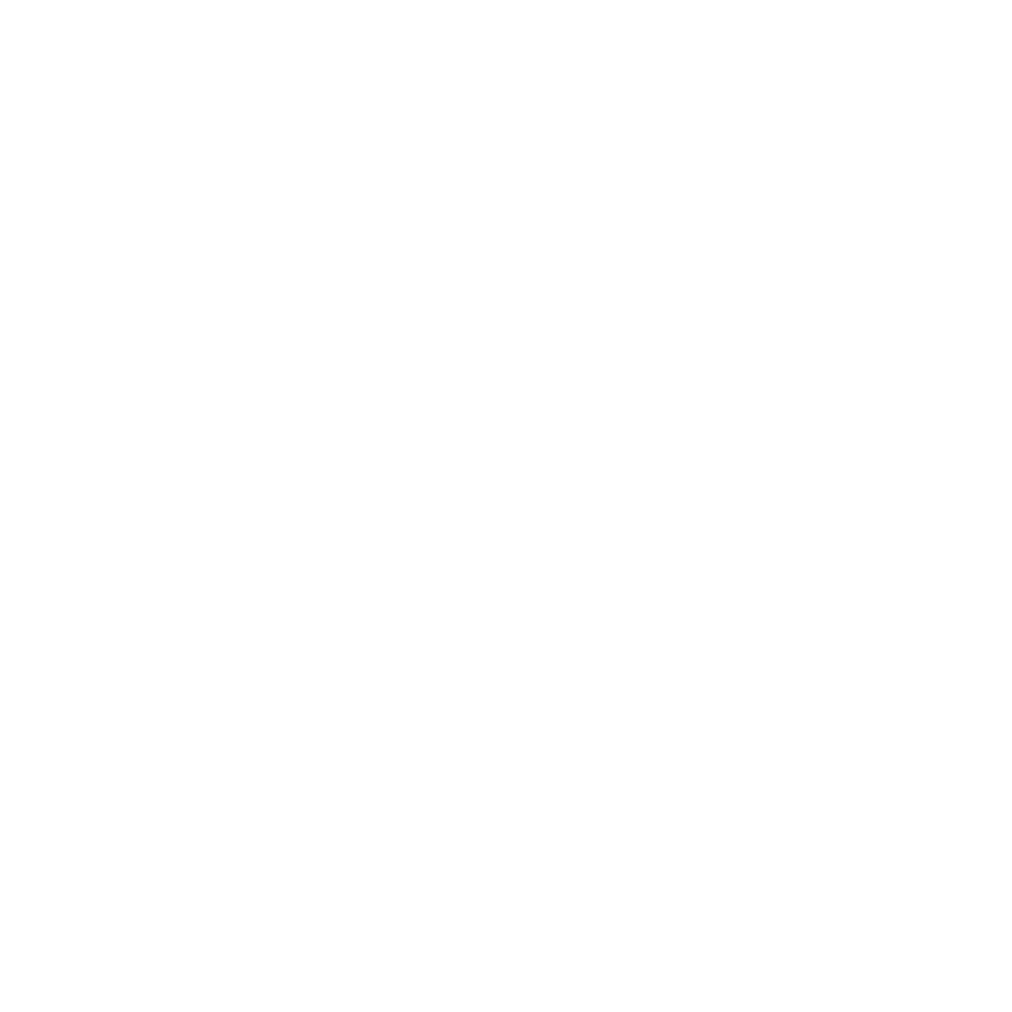

(-80, 80)

In [1]:
# importing lib and setting a list of meshes to be tested
import sys 
import amfe
import matplotlib.pyplot as plt
import numpy as np
import scipy
import copy
import pandas as pd
import mpl_toolkits.mplot3d as a3
%matplotlib notebook

msh_dict = {}
msh_dict[0] = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_1.msh')
msh_dict[1] = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_2.msh')
msh_dict[2] = amfe.amfe_dir('meshes/test_meshes/turbine_section_par_3.msh')


domain_id = {}
domain_id[0] = 16
domain_id[1] = 16
domain_id[2] = 16

# select mesh to be plotted
mesh_id1 = 0
mshfile = msh_dict[mesh_id1]

m1 = amfe.Mesh()
m1.import_msh(mshfile)

fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
ax = a3.Axes3D(fig)
ax = amfe.plot3Dmesh(m1,ax,alpha=0.2, plot_nodes = False)
#ax.set_axis_off()
#ax.view_init(90, -90)
ax.set_xlim([-80,80])
ax.set_ylim([90,250])
ax.set_zlim([-80,80])
#plt.show()

(-80, 80)

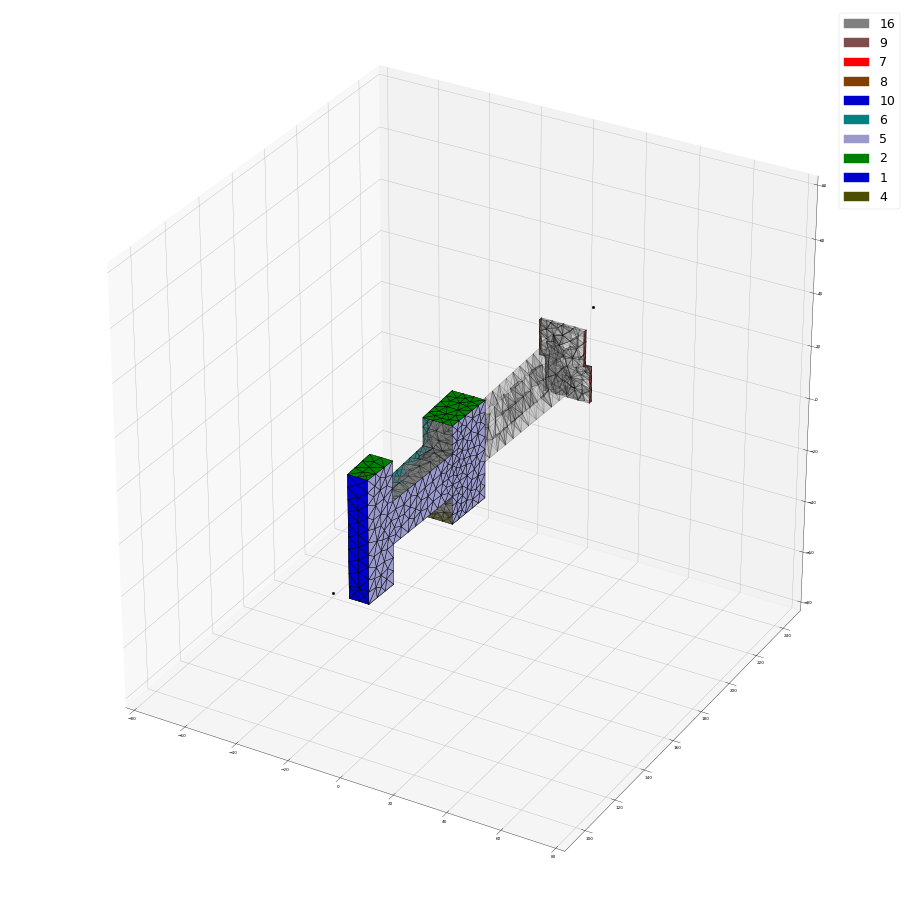

In [2]:
# select mesh to be plotted
mesh_id1 = 1
mshfile = msh_dict[mesh_id1]

m1 = amfe.Mesh()
m1.import_msh(mshfile)

fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
ax = a3.Axes3D(fig)
ax = amfe.plot3Dmesh(m1,ax,alpha=0.2, plot_nodes = False)
#ax.set_axis_off()
#ax.view_init(90, -90)
ax.set_xlim([-80,80])
ax.set_ylim([90,250])
ax.set_zlim([-80,80])
#plt.show()

In [3]:
my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3,  plane_stress=False)

# creating a mechanical component
my_comp = amfe.MechanicalSystem()

# setting mesh object and selecting problem domain
my_comp.set_mesh_obj(m1)
domain = my_comp.set_domain(16,my_material)

domain.split_in_partitions()

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 2059 elements and 2373 dofs.
Time taken for preallocation: 0.03 seconds.
Extract interface node from sub_1 and sub_2
Interface nodes from sub_2 and sub_1 already extracted


{1: <amfe.mesh.SubMesh at 0x1dcddc647f0>,
 2: <amfe.mesh.SubMesh at 0x1dcdcebb320>}

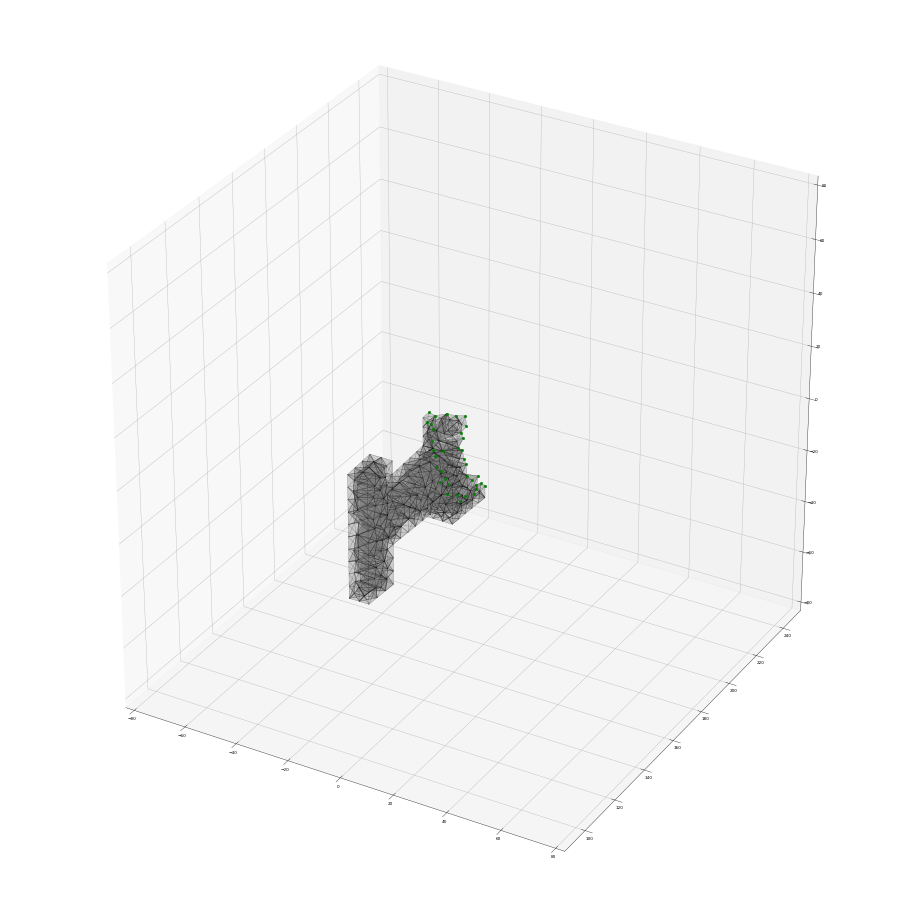

In [4]:
fig = plt.figure(figsize=(30, 30), dpi= 30, facecolor='w', edgecolor='k')
ax = a3.Axes3D(fig)
ax = amfe.plot3D_submesh(domain.groups[1],ax, plot_nodes = False)
#ax.view_init(90, -90)
ax.set_xlim([-80,80])
ax.set_ylim([90,250])
ax.set_zlim([-80,80])
plt.show()

In [5]:
super_domain = amfe.feti_solver.SuperDomain(domain.groups)


Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1029 elements and 1224 dofs.
Time taken for preallocation: 0.02 seconds.
Preallocating the stiffness matrix
Done preallocating stiffness matrix with 1030 elements and 1257 dofs.
Time taken for preallocation: 0.02 seconds.


In [8]:
super_domain.create_K_and_f_list()

In [11]:
K = super_domain.K_list[0]

In [12]:
amfe.save_object(K, 'K_par1_3D.pkl')

In [13]:
K = super_domain.K_list[1]

In [14]:
amfe.save_object(K, 'K_par2_3D.pkl')